**AI Health Advisor – Neural Network-Based Multi-Disease Prediction System**

**Breast Cancer Diagnosis Prediction**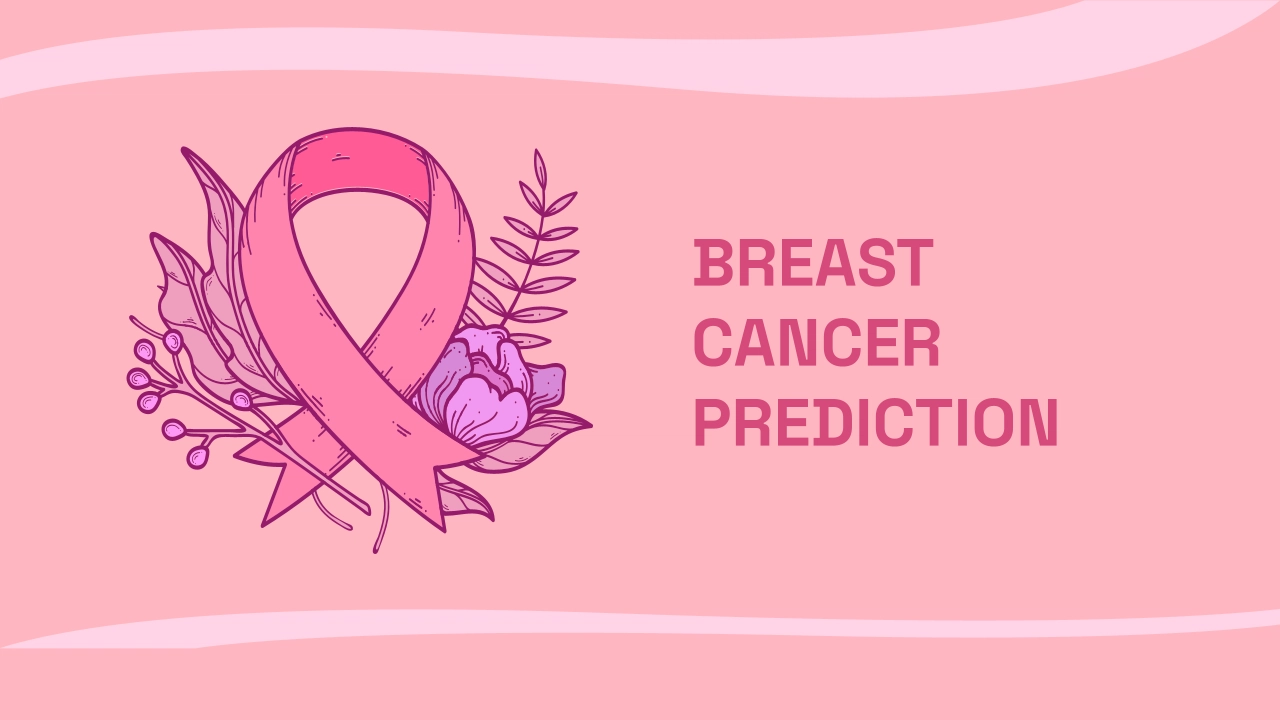

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Exploratory Data Analysis**
EDA helps determine how best to manipulate data sources to get the answers you
need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them.

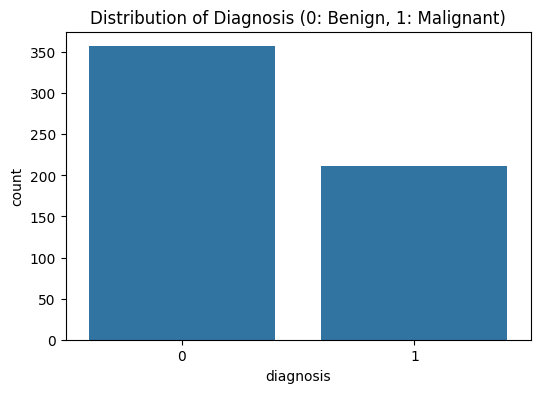

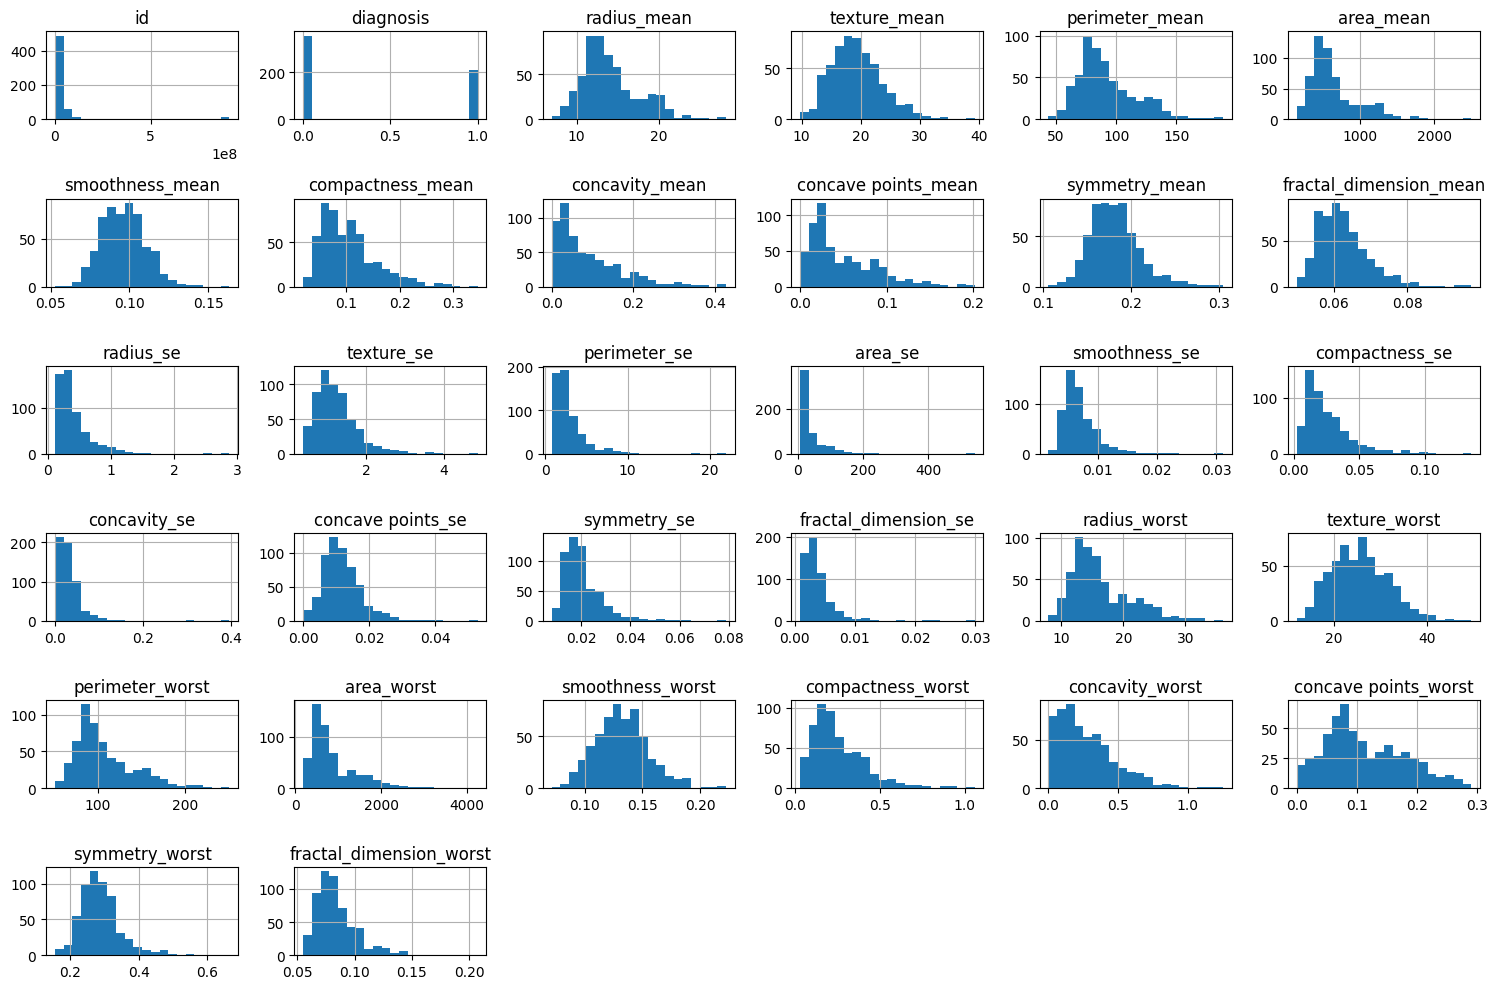

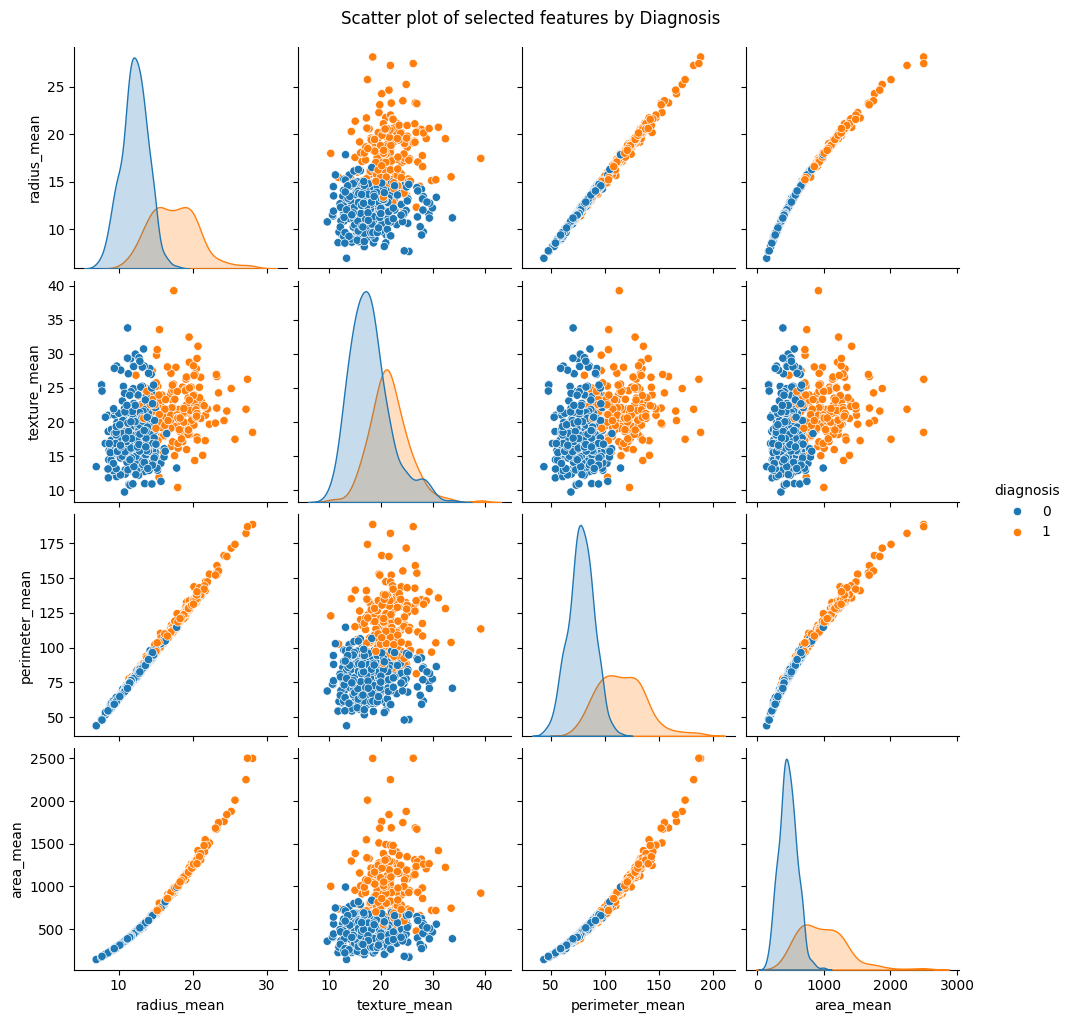

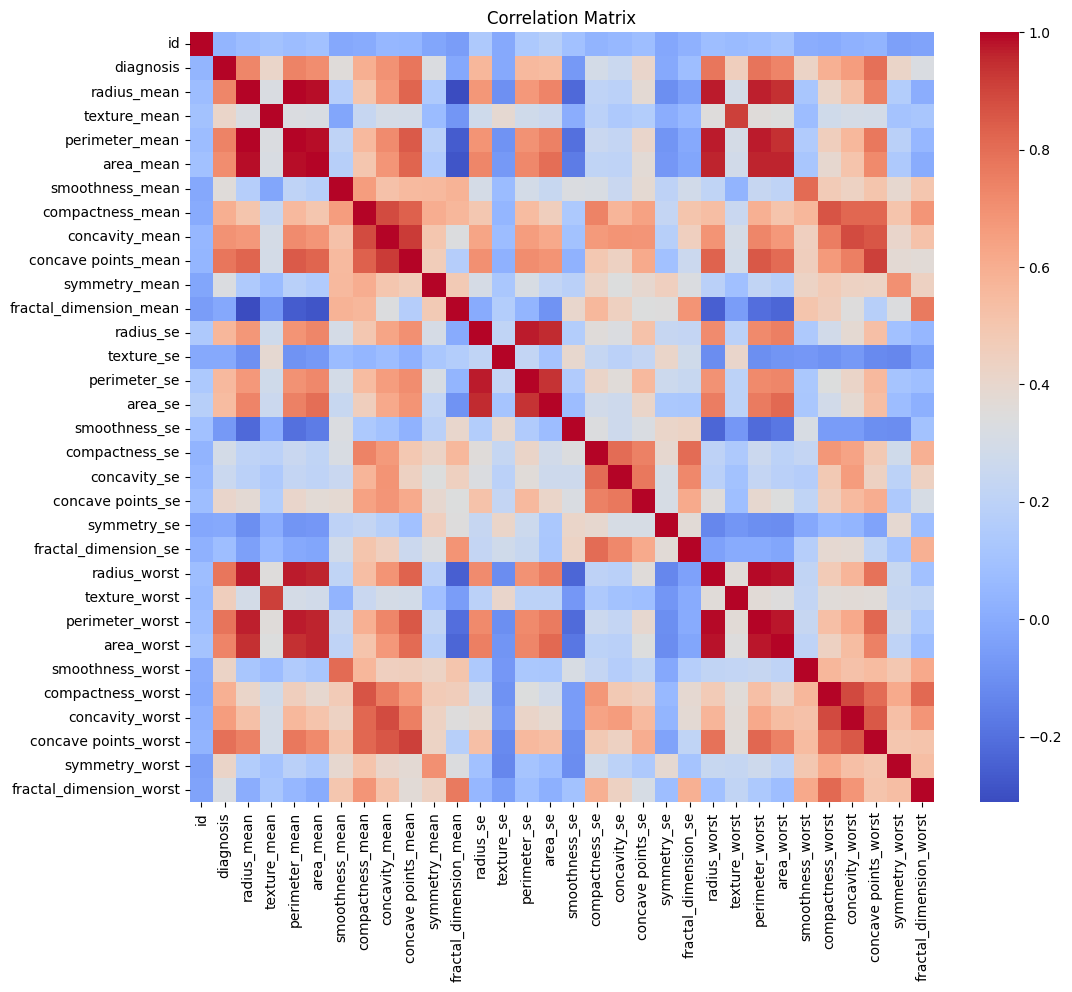

In [3]:
# Convert the 'diagnosis' column to numerical (M=1, B=0)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Visualize the distribution of the target variable 'diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (0: Benign, 1: Malignant)')
plt.show()

# Plot histograms for numerical features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot scatter plots for a few pairs of features to visualize relationships
# Selecting a few features for demonstration
features_to_scatter = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
sns.pairplot(data, vars=features_to_scatter, hue='diagnosis', diag_kind='kde')
plt.suptitle('Scatter plot of selected features by Diagnosis', y=1.02)
plt.show()

# Correlation matrix to visualize relationships between features
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing**
There are several steps in this process, including data cleansing, integration, alteration, and reduction. Each step is important to make sure that the data used to teach AI models is accurate, consistent, and representative. Data cleaning begins with identifying and correcting mistakes, inconsistencies, and outliers.


In [4]:
import numpy as np
# Remove the 'id' column as it is not useful for training
data = data.drop('id', axis=1)

# Separate features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a. Implement ANN components:
# d. Activation Functions: ReLU, sigmoid, tanh

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# b. Basic Perceptron for binary classification
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# c. Multilayer Perceptron (MLP) for multi-disease prediction (adapted for binary)
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=100, activation='sigmoid', optimizer='sgd', l1_reg=0, l2_reg=0, dropout_rate=0.0, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation
        self.optimizer = optimizer
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bias_output = np.zeros((1, self.output_size))

        # Adam optimizer parameters
        self.m_weights_ih, self.v_weights_ih = np.zeros_like(self.weights_input_hidden), np.zeros_like(self.weights_input_hidden)
        self.m_bias_h, self.v_bias_h = np.zeros_like(self.bias_hidden), np.zeros_like(self.bias_hidden)
        self.m_weights_ho, self.v_weights_ho = np.zeros_like(self.weights_hidden_output), np.zeros_like(self.weights_hidden_output)
        self.m_bias_o, self.v_bias_o = np.zeros_like(self.bias_output), np.zeros_like(self.bias_output)
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.t = 0

    def _activation(self, x):
        if self.activation == 'relu':
            return relu(x)
        elif self.activation == 'sigmoid':
            return sigmoid(x)
        elif self.activation == 'tanh':
            return tanh(x)
        else:
            raise ValueError("Invalid activation function")

    def _activation_derivative(self, x):
        if self.activation == 'relu':
            return relu_derivative(x)
        elif self.activation == 'sigmoid':
            return sigmoid_derivative(x)
        elif self.activation == 'tanh':
            return tanh_derivative(x)
        else:
            raise ValueError("Invalid activation function")

    def forward(self, inputs, training=True):
        # Input to hidden
        self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self._activation(self.hidden_input)

        # Dropout on hidden layer output during training
        if training and self.dropout_rate > 0:
            self.dropout_mask = (np.random.rand(*self.hidden_output.shape) > self.dropout_rate) / (1 - self.dropout_rate)
            self.hidden_output *= self.dropout_mask

        # Hidden to output
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = sigmoid(self.output_input) # Using sigmoid for binary classification output

        return self.predicted_output

    # e. Backpropagation Algorithm
    def backward(self, inputs, targets, predicted_output):
        # Calculate the error
        output_error = targets - predicted_output
        output_delta = output_error * sigmoid_derivative(predicted_output) # Derivative of sigmoid for output layer

        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        # Apply dropout mask to hidden error during backprop if used in forward pass
        if hasattr(self, 'dropout_mask'):
             hidden_error *= self.dropout_mask

        hidden_delta = hidden_error * self._activation_derivative(self.hidden_output)

        # Calculate gradients
        self.gradients_weights_hidden_output = self.hidden_output.T.dot(output_delta)
        self.gradients_bias_output = np.sum(output_delta, axis=0, keepdims=True)
        self.gradients_weights_input_hidden = inputs.T.dot(hidden_delta)
        self.gradients_bias_hidden = np.sum(hidden_delta, axis=0, keepdims=True)

        # f. Optimization Techniques: Compare SGD, Adam
        if self.optimizer == 'sgd':
            # SGD update
            self.weights_hidden_output += self.learning_rate * self.gradients_weights_hidden_output
            self.bias_output += self.learning_rate * self.gradients_bias_output
            self.weights_input_hidden += self.learning_rate * self.gradients_weights_input_hidden
            self.bias_hidden += self.learning_rate * self.gradients_bias_hidden

        elif self.optimizer == 'adam':
            # Adam update
            self.t += 1
            # Update for weights_input_hidden
            self.m_weights_ih = self.beta1 * self.m_weights_ih + (1 - self.beta1) * self.gradients_weights_input_hidden
            self.v_weights_ih = self.beta2 * self.v_weights_ih + (1 - self.beta2) * (self.gradients_weights_input_hidden**2)
            m_hat_weights_ih = self.m_weights_ih / (1 - self.beta1**self.t)
            v_hat_weights_ih = self.v_weights_ih / (1 - self.beta2**self.t)
            self.weights_input_hidden += self.learning_rate * m_hat_weights_ih / (np.sqrt(v_hat_weights_ih) + self.epsilon)

            # Update for bias_hidden
            self.m_bias_h = self.beta1 * self.m_bias_h + (1 - self.beta1) * self.gradients_bias_hidden
            self.v_bias_h = self.beta2 * self.v_bias_h + (1 - self.beta2) * (self.gradients_bias_hidden**2)
            m_hat_bias_h = self.m_bias_h / (1 - self.beta1**self.t)
            v_hat_bias_h = self.v_bias_h / (1 - self.beta2**self.t)
            self.bias_hidden += self.learning_rate * m_hat_bias_h / (np.sqrt(v_hat_bias_h) + self.epsilon)

            # Update for weights_hidden_output
            self.m_weights_ho = self.beta1 * self.m_weights_ho + (1 - self.beta1) * self.gradients_weights_hidden_output
            self.v_weights_ho = self.beta2 * self.v_weights_ho + (1 - self.beta2) * (self.gradients_weights_hidden_output**2)
            m_hat_weights_ho = self.m_weights_ho / (1 - self.beta1**self.t)
            v_hat_weights_ho = self.v_weights_ho / (1 - self.beta2**self.t)
            self.weights_hidden_output += self.learning_rate * m_hat_weights_ho / (np.sqrt(v_hat_weights_ho) + self.epsilon)

            # Update for bias_output
            self.m_bias_o = self.beta1 * self.m_bias_o + (1 - self.beta1) * self.gradients_bias_output
            self.v_bias_o = self.beta2 * self.v_bias_o + (1 - self.beta2) * (self.gradients_bias_output**2)
            m_hat_bias_o = self.m_bias_o / (1 - self.beta1**self.t)
            v_hat_bias_o = self.v_bias_o / (1 - self.beta2**self.t)
            self.bias_output += self.learning_rate * m_hat_bias_o / (np.sqrt(v_hat_bias_o) + self.epsilon)


        # g. Regularization: L1, L2
        if self.l1_reg > 0:
            self.weights_input_hidden -= self.l1_reg * np.sign(self.weights_input_hidden)
            self.weights_hidden_output -= self.l1_reg * np.sign(self.weights_hidden_output)
        if self.l2_reg > 0:
            self.weights_input_hidden -= self.l2_reg * self.weights_input_hidden
            self.weights_hidden_output -= self.l2_reg * self.weights_hidden_output

    def train(self, training_inputs, labels):
        num_samples = training_inputs.shape[0]
        for epoch in range(self.epochs):
            # Shuffle data for each epoch
            permutation = np.random.permutation(num_samples)
            shuffled_inputs = training_inputs[permutation]
            shuffled_labels = labels[permutation]

            for i in range(0, num_samples, self.batch_size):
                batch_inputs = shuffled_inputs[i:i + self.batch_size]
                batch_labels = shuffled_labels[i:i + self.batch_size].reshape(-1, 1) # Ensure labels are 2D

                # Forward pass
                predicted_output = self.forward(batch_inputs, training=True)

                # Backpropagation and weight update
                self.backward(batch_inputs, batch_labels, predicted_output)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.epochs} completed")

    def predict(self, inputs):
        # Forward pass without dropout during testing
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self._activation(hidden_input)
        output_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        predicted_output = sigmoid(output_input) # Using sigmoid for binary classification output
        return (predicted_output > 0.5).astype(int) # Convert probabilities to binary predictions


# Implement Batch Normalization (added as a separate layer/function)
class BatchNormalization:
    def __init__(self, num_features, epsilon=1e-5, momentum=0.9):
        self.epsilon = epsilon
        self.momentum = momentum
        self.gamma = np.ones(num_features)
        self.beta = np.zeros(num_features)
        self.running_mean = np.zeros(num_features)
        self.running_var = np.ones(num_features)

    def forward(self, inputs, training=True):
        if training:
            mean = np.mean(inputs, axis=0)
            var = np.var(inputs, axis=0)
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
            self.x_normalized = (inputs - mean) / np.sqrt(var + self.epsilon)
        else:
            self.x_normalized = (inputs - self.running_mean) / np.sqrt(self.running_var + self.epsilon)

        self.output = self.gamma * self.x_normalized + self.beta
        return self.output

    def backward(self, d_output):
        # Simplified backprop for demonstration
        d_x_normalized = d_output * self.gamma
        d_var = np.sum(d_x_normalized * (inputs - mean) * (-0.5) * (var + self.epsilon)**(-1.5), axis=0) # Need inputs and mean from forward pass
        d_mean = np.sum(d_x_normalized * (-1 / np.sqrt(var + self.epsilon)), axis=0) + d_var * (-2 * np.mean(inputs, axis=0) / (var + self.epsilon))
        d_inputs = d_x_normalized / np.sqrt(var + self.epsilon) + d_var * 2 * (inputs - mean) / (var + self.epsilon)**2 + d_mean / inputs.shape[0]
        d_gamma = np.sum(d_output * self.x_normalized, axis=0)
        d_beta = np.sum(d_output, axis=0)

        return d_inputs, d_gamma, d_beta


**Single bold text layer vs Multi-layer Perceptron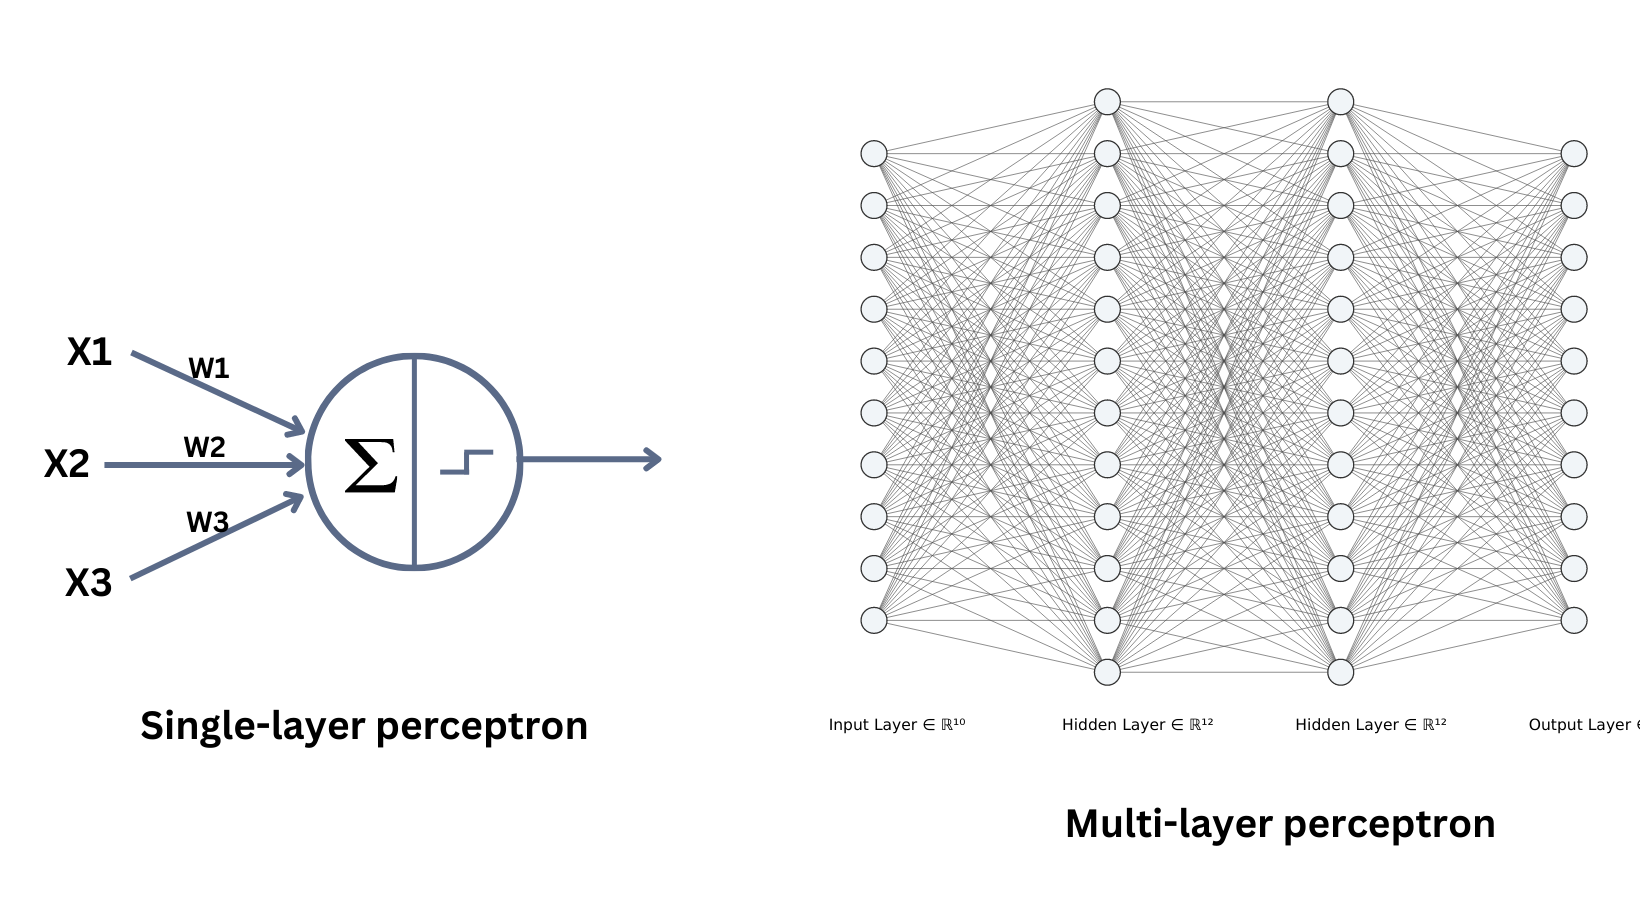**

In [5]:

# --- Example Usage ---

# Basic Perceptron
print("Training Perceptron:")
perceptron = Perceptron(input_size=X_train_scaled.shape[1], learning_rate=0.01, epochs=1000)
perceptron.train(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
y_pred_perceptron = [perceptron.predict(x) for x in X_test_scaled]
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")


# MLP with SGD optimizer
print("\nTraining MLP with SGD:")
mlp_sgd = MLP(input_size=X_train_scaled.shape[1], hidden_size=30, output_size=1, learning_rate=0.001, epochs=1000, activation='relu', optimizer='sgd', l1_reg=0.001, l2_reg=0.001, dropout_rate=0.2)
mlp_sgd.train(X_train_scaled, y_train.values) # Pass y_train as numpy array

y_pred_mlp_sgd = mlp_sgd.predict(X_test_scaled)
accuracy_mlp_sgd = accuracy_score(y_test, y_pred_mlp_sgd)
print(f"MLP (SGD, ReLU, L1/L2, Dropout) Accuracy: {accuracy_mlp_sgd:.4f}")

# MLP with Adam optimizer
print("\nTraining MLP with Adam:")
mlp_adam = MLP(input_size=X_train_scaled.shape[1], hidden_size=30, output_size=1, learning_rate=0.001, epochs=1000, activation='tanh', optimizer='adam')
mlp_adam.train(X_train_scaled, y_train.values) # Pass y_train as numpy array

y_pred_mlp_adam = mlp_adam.predict(X_test_scaled)
accuracy_mlp_adam = accuracy_score(y_test, y_pred_mlp_adam)
print(f"MLP (Adam, Tanh) Accuracy: {accuracy_mlp_adam:.4f}")

Training Perceptron:
Perceptron Accuracy: 0.9298

Training MLP with SGD:
Epoch 100/1000 completed
Epoch 200/1000 completed
Epoch 300/1000 completed
Epoch 400/1000 completed
Epoch 500/1000 completed
Epoch 600/1000 completed
Epoch 700/1000 completed
Epoch 800/1000 completed
Epoch 900/1000 completed
Epoch 1000/1000 completed
MLP (SGD, ReLU, L1/L2, Dropout) Accuracy: 0.6228

Training MLP with Adam:
Epoch 100/1000 completed
Epoch 200/1000 completed
Epoch 300/1000 completed
Epoch 400/1000 completed
Epoch 500/1000 completed
Epoch 600/1000 completed
Epoch 700/1000 completed
Epoch 800/1000 completed
Epoch 900/1000 completed
Epoch 1000/1000 completed
MLP (Adam, Tanh) Accuracy: 0.9737


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=c3b7676388dd7df4febde8008d7aca9ab29b30375e5698539fa1d62007e554b5
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built MiniSom

Training SOM:
SOM training complete.


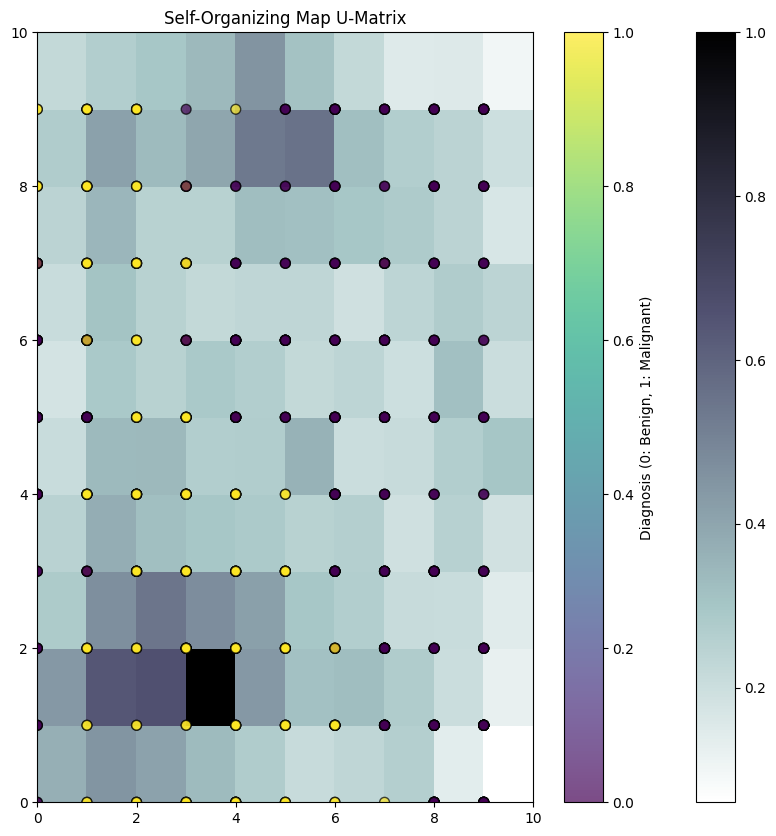


Data with SOM Cluster assignments:
   diagnosis  som_cluster
0          1           22
1          1           43
2          1           23
3          1            9
4          1           60

Mean feature values per SOM Cluster:
             radius_mean  texture_mean  perimeter_mean   area_mean  \
som_cluster                                                          
0               9.380000     16.335000       61.285000  275.350000   
1              11.067333     17.476667       73.140000  399.133333   
2              11.580500     18.795000       77.725000  422.350000   
3              12.476667     17.476667       81.916667  481.500000   
4              13.041667     21.306667       85.051667  530.316667   

             smoothness_mean  compactness_mean  concavity_mean  \
som_cluster                                                      
0                   0.106900          0.150600        0.361900   
1                   0.094130          0.150033        0.117653   
2              

In [6]:
# Self-Organizing Maps (SOM): For clustering patients into risk groups.

import matplotlib.pyplot as plt
import numpy as np
# Install MiniSom
!pip install MiniSom

from minisom import MiniSom

# --- Implement Self-Organizing Maps (SOM) ---
# For clustering patients into risk groups.

# We will use the scaled features for SOM
X_scaled = scaler.fit_transform(X)

# Initialize and train the SOM
# x, y: dimensions of the SOM grid
# input_len: number of features (dimensions of input data)
# sigma: neighborhood radius
# learning_rate: learning rate
# neighborhood_function: type of neighborhood function
# random_seed: for reproducibility
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)

# Initialize weights randomly or from the data
som.random_weights_init(X_scaled)
# Alternatively, initialize with a sample of the data:
# som.pca_weights_init(X_scaled)


# Train the SOM
print("\nTraining SOM:")
som.train_random(data=X_scaled, num_iteration=10000)
print("SOM training complete.")

# Visualize the U-Matrix (Unified Distance Matrix)
# The U-matrix shows the distance between neighboring neurons.
# Areas with low distance indicate clusters.
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Transposed for better visualization
plt.colorbar()
plt.title('Self-Organizing Map U-Matrix')

# Overlay the winner neurons (Best Matching Units - BMUs) for each sample
# BMUs represent the neuron in the SOM grid that is closest to each data sample.
# We can color the BMUs based on the target variable to see how clusters relate to diagnosis.

# Get the winning neuron for each sample
winner_coordinates = np.array([som.winner(x) for x in X_scaled]).T

# Plot the BMUs
plt.scatter(winner_coordinates[0], winner_coordinates[1],
            c=data['diagnosis'], # Color points by diagnosis (0: Benign, 1: Malignant)
            cmap='viridis',
            alpha=0.7,
            s=50, # Marker size
            edgecolor='k') # Black edge around markers

# Add legend for the diagnosis
cbar = plt.colorbar()
cbar.set_label('Diagnosis (0: Benign, 1: Malignant)')

plt.show()

# Assign data points to clusters based on their BMUs
# You can define clusters manually based on the U-matrix visualization
# Or use k-means on the SOM weights or BMUs for more automated clustering.

# Example: Assign each data point to the cluster of its winning neuron
som_clusters = np.zeros(X_scaled.shape[0], dtype=int)
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    som_clusters[i] = w[0] * som._weights.shape[0] + w[1] # Map 2D coordinates to a unique cluster index

# Add the SOM cluster assignment back to the original data or a new DataFrame
data_with_som_clusters = data.copy()
data_with_som_clusters['som_cluster'] = som_clusters

print("\nData with SOM Cluster assignments:")
print(data_with_som_clusters[['diagnosis', 'som_cluster']].head())

# You can further analyze the characteristics of each SOM cluster
# For example, calculate the mean values of features within each cluster
print("\nMean feature values per SOM Cluster:")
print(data_with_som_clusters.groupby('som_cluster')[X.columns].mean().head())

# Or look at the distribution of diagnoses within each cluster
print("\nDiagnosis distribution per SOM Cluster:")
print(data_with_som_clusters.groupby('som_cluster')['diagnosis'].value_counts(normalize=True).unstack(fill_value=0).head())

# This SOM implementation provides a way to visualize and cluster
# the patient data based on their feature similarities, which can be
# used to identify potential risk groups. Further analysis of the
# characteristics within each identified cluster is necessary to
# define the risk profiles.


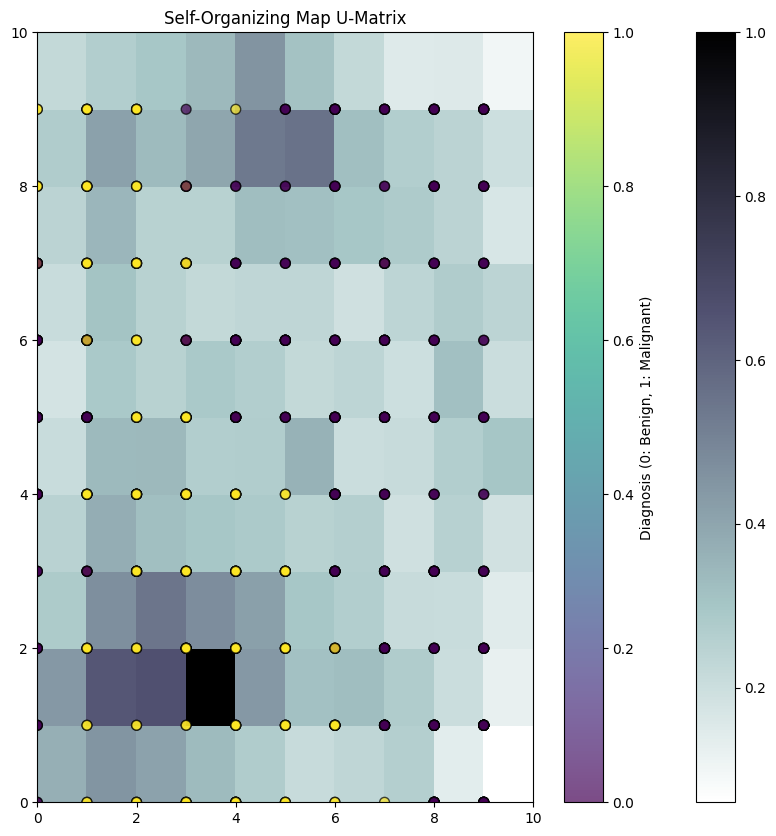

In [7]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Transposed for better visualization
plt.colorbar()
plt.title('Self-Organizing Map U-Matrix')

# Overlay the winner neurons (Best Matching Units - BMUs) for each sample
# BMUs represent the neuron in the SOM grid that is closest to each data sample.
# We can color the BMUs based on the target variable to see how clusters relate to diagnosis.

# Get the winning neuron for each sample
winner_coordinates = np.array([som.winner(x) for x in X_scaled]).T

# Plot the BMUs
plt.scatter(winner_coordinates[0], winner_coordinates[1],
            c=data['diagnosis'], # Color points by diagnosis (0: Benign, 1: Malignant)
            cmap='viridis',
            alpha=0.7,
            s=50, # Marker size
            edgecolor='k') # Black edge around markers

# Add legend for the diagnosis
cbar = plt.colorbar()
cbar.set_label('Diagnosis (0: Benign, 1: Malignant)')

plt.show()


Training RBFN: Finding 50 RBF centers with KMeans...
KMeans clustering complete.
Computing RBF output matrix...
RBF output matrix computed.
Computing output layer weights using pseudo-inverse...
Output layer weights computed.


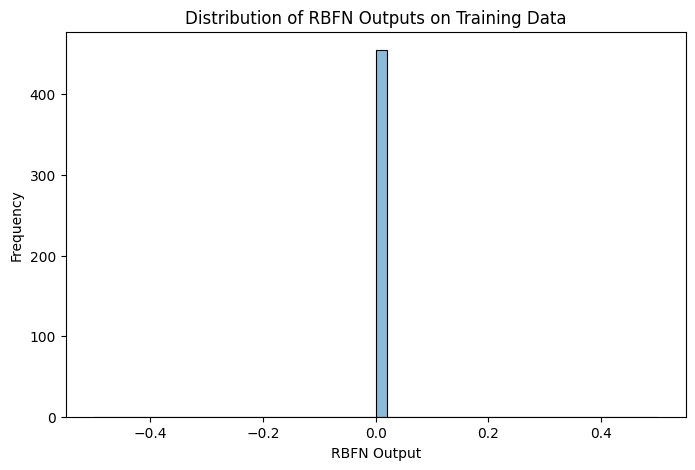

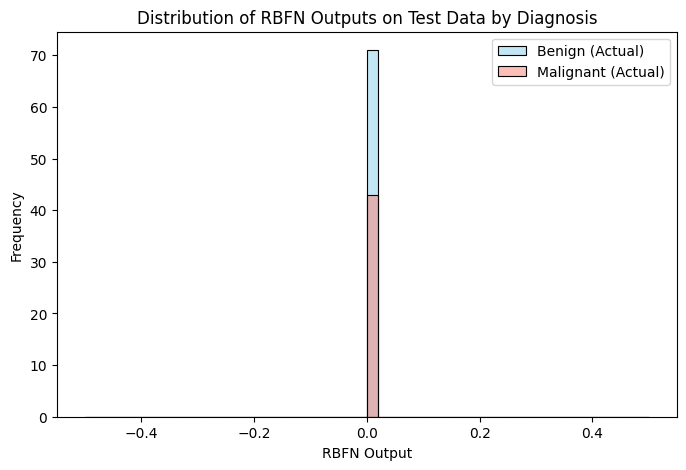


Anomaly Detection Results (based on RBFN output threshold):
Threshold used: 0.5
True Positives (Malignant correctly identified): 0
False Positives (Benign incorrectly identified): 0
True Negatives (Benign correctly identified): 71
False Negatives (Malignant incorrectly identified): 43
Precision: 0.0000
Recall (Sensitivity): 0.0000
F1-Score: 0.0000


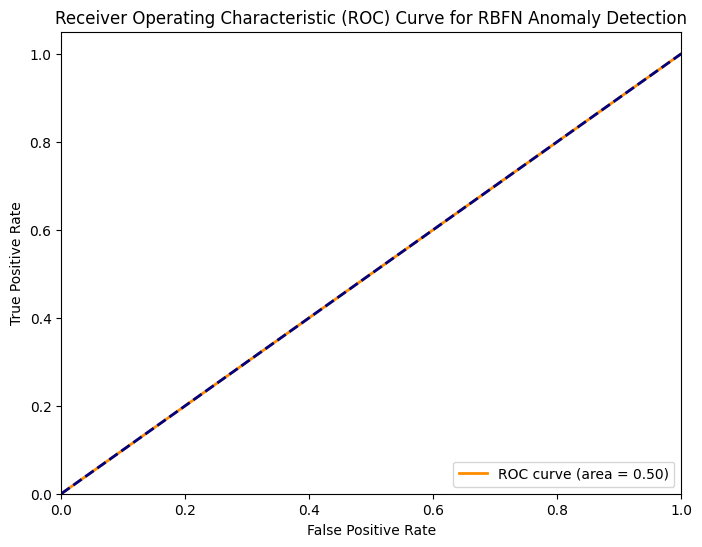


ROC AUC Score for RBFN Anomaly Detection: 0.5000


In [8]:
# h. Radial Basis Function Network (RBFN) for anomaly detection
from sklearn.cluster import KMeans

class RBFN:
    def __init__(self, num_rbf_units, learning_rate=0.01, epochs=100, beta=1.0):
        self.num_rbf_units = num_rbf_units
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = beta # Controls the width of the RBF kernels

    def _gaussian_kernel(self, x, c):
        # Gaussian kernel function
        return np.exp(-self.beta * np.linalg.norm(x - c)**2)

    def fit(self, X, y):
        # 1. Select RBF centers (using KMeans clustering on the data)
        print(f"\nTraining RBFN: Finding {self.num_rbf_units} RBF centers with KMeans...")
        kmeans = KMeans(n_clusters=self.num_rbf_units, random_state=42, n_init=10) # Added n_init
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_
        print("KMeans clustering complete.")

        # 2. Compute the RBF output matrix (phi)
        print("Computing RBF output matrix...")
        phi = np.zeros((X.shape[0], self.num_rbf_units))
        for i in range(X.shape[0]):
            for j in range(self.num_rbf_units):
                phi[i, j] = self._gaussian_kernel(X[i], self.centers[j])
        print("RBF output matrix computed.")

        # Add a bias term to phi (optional, but common)
        phi = np.concatenate((np.ones((phi.shape[0], 1)), phi), axis=1)


        # 3. Compute the weights (using pseudo-inverse or gradient descent)
        # Using pseudo-inverse for simplicity here (closed-form solution for linear output layer)
        # This assumes a linear output layer mapping RBF outputs to predictions.
        # For a more complex RBFN with non-linear output, gradient descent would be needed.
        print("Computing output layer weights using pseudo-inverse...")
        self.weights = np.linalg.pinv(phi).dot(y)
        print("Output layer weights computed.")


    def predict(self, X):
        # Compute the RBF output matrix for new data
        phi = np.zeros((X.shape[0], self.num_rbf_units))
        for i in range(X.shape[0]):
            for j in range(self.num_rbf_units):
                phi[i, j] = self._gaussian_kernel(X[i], self.centers[j])

        # Add the bias term
        phi = np.concatenate((np.ones((phi.shape[0], 1)), phi), axis=1)

        # Compute the predicted output
        predictions = phi.dot(self.weights)

        # For anomaly detection, we might use the output as an "anomaly score".
        # Higher scores could indicate anomalies.
        # For binary classification (like in this dataset), we can threshold the output.
        return predictions

    def detect_anomalies(self, X, threshold):
        # Predict the RBFN output for the data
        outputs = self.predict(X)
        # Anomalies are data points with outputs above a certain threshold
        return outputs > threshold, outputs # Return anomaly mask and the raw outputs

# --- Example Usage of RBFN for Anomaly Detection ---

# In anomaly detection, we typically train the model on "normal" data
# and then identify data points that deviate significantly from this norm.
# For this dataset, we'll treat the Benign cases (diagnosis=0) as "normal" data
# to train the RBFN, and then test its ability to detect Malignant cases (diagnosis=1)
# as anomalies.

# Separate normal (Benign) data
X_normal = X_train_scaled[y_train == 0]
y_normal = y_train[y_train == 0] # Not strictly needed for this RBFN implementation

# Initialize and train the RBFN on normal data
# The number of RBF units is a hyperparameter to tune.
num_rbf_units = 50 # Example number of RBF units
rbfn = RBFN(num_rbf_units=num_rbf_units, beta=1.0) # beta controls the width of RBFs
rbfn.fit(X_normal, y_normal)

# Now, predict the RBFN output for the entire test set
test_outputs = rbfn.predict(X_test_scaled)

# To use this for anomaly detection, we need to set a threshold.
# A simple approach is to find a threshold that distinguishes between
# the outputs for normal and anomalous samples in the training data (or a validation set).
# Here, we'll look at the distribution of outputs on the training data
# to help choose a threshold.

train_outputs = rbfn.predict(X_train_scaled)

# Visualize the distribution of outputs on the training data
plt.figure(figsize=(8, 5))
sns.histplot(train_outputs, bins=50, kde=True)
plt.title('Distribution of RBFN Outputs on Training Data')
plt.xlabel('RBFN Output')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, we can pick a threshold.
# For example, we can choose a threshold such that a small percentage
# of the training data (normal data) is considered anomalous (false positives).
# Or, we can analyze the outputs for the known anomalies in the test set.

# Let's look at the outputs for the test set, separated by actual diagnosis
test_outputs_benign = test_outputs[y_test == 0]
test_outputs_malignant = test_outputs[y_test == 1]

plt.figure(figsize=(8, 5))
sns.histplot(test_outputs_benign, bins=50, kde=True, color='skyblue', label='Benign (Actual)')
sns.histplot(test_outputs_malignant, bins=50, kde=True, color='salmon', label='Malignant (Actual)')
plt.title('Distribution of RBFN Outputs on Test Data by Diagnosis')
plt.xlabel('RBFN Output')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# From this plot, we can observe that Malignant cases tend to have higher RBFN outputs.
# We can choose a threshold that separates these distributions.
# Let's try a threshold based on the percentile of the training outputs,
# or by visually inspecting the test output distributions.

# Example threshold (can be tuned):
anomaly_threshold = 0.5 # This is just an example; needs tuning

# Detect anomalies in the test set using the chosen threshold
is_anomaly, anomaly_scores = rbfn.detect_anomalies(X_test_scaled, threshold=anomaly_threshold)

# Evaluate the performance of the RBFN as an anomaly detector
# We want to see how well it identifies the Malignant cases (anomalies)
# among the Benign cases (normal).

# Malignant cases in the test set are the true anomalies (y_test == 1)
true_anomalies = (y_test == 1)

# Evaluate performance metrics for anomaly detection
# We can use metrics like Precision, Recall, F1-score, and AUC.
# For binary classification context:
# True Positives (TP): Malignant cases correctly identified as anomalies
# False Positives (FP): Benign cases incorrectly identified as anomalies
# True Negatives (TN): Benign cases correctly identified as normal
# False Negatives (FN): Malignant cases incorrectly identified as normal

TP = np.sum(is_anomaly[true_anomalies])
FP = np.sum(is_anomaly[~true_anomalies]) # ~true_anomalies means Benign cases
TN = np.sum(~is_anomaly[~true_anomalies])
FN = np.sum(~is_anomaly[true_anomalies])

print("\nAnomaly Detection Results (based on RBFN output threshold):")
print(f"Threshold used: {anomaly_threshold}")
print(f"True Positives (Malignant correctly identified): {TP}")
print(f"False Positives (Benign incorrectly identified): {FP}")
print(f"True Negatives (Benign correctly identified): {TN}")
print(f"False Negatives (Malignant incorrectly identified): {FN}")

# Calculate Precision, Recall, F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# We can also use AUC for ROC curve to evaluate the anomaly score directly
from sklearn.metrics import roc_curve, auc

# The anomaly scores are the `test_outputs`.
# The true labels for anomaly are `y_test` (1 for Malignant, 0 for Benign).
# Note: For AUC calculation, the positive class (anomaly) should be 1.
# Our `y_test` is already 1 for Malignant, which is what we treat as anomaly.
# The RBFN output is higher for samples further from the "normal" centers,
# so higher output should correspond to the positive class (anomaly).

fpr, tpr, thresholds = roc_curve(y_test, anomaly_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RBFN Anomaly Detection')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score for RBFN Anomaly Detection: {roc_auc:.4f}")

# This demonstrates how an RBFN can be used for anomaly detection.
# Training on normal data and setting a threshold on the RBFN output allows
# identifying data points that are significantly different from the normal pattern.
# The choice of the number of RBF units, beta, and the anomaly threshold are
# crucial hyperparameters for performance.


In [9]:
import numpy as np
# --- Implement Bidirectional Associative Memory (BAM) ---
# For associating symptoms with diseases (as a rule-based system).

# Note: BAM is primarily used for associating patterns (vectors).
# In the context of "symptoms with diseases" as a rule-based system,
# we can represent symptom patterns and disease patterns as binary vectors.
# A BAM network can then be trained to associate these patterns.

# Example: Define some simplified symptom and disease patterns
# Let's imagine 5 possible symptoms and 3 possible diseases.
# Symptoms: [S1, S2, S3, S4, S5]
# Diseases: [D1, D2, D3]

# Represent symptom patterns as bipolar vectors (+1 if symptom is present, -1 if absent)
# Represent disease patterns as bipolar vectors (+1 if disease is present, -1 if absent)

# Example patterns (hypothetical):
# Pattern 1: Symptoms [1, 1, -1, -1, -1]  <-> Disease [1, -1, -1] (Disease D1)
# Pattern 2: Symptoms [-1, -1, 1, 1, -1] <-> Disease [-1, 1, -1] (Disease D2)
# Pattern 3: Symptoms [1, -1, 1, -1, 1]  <-> Disease [-1, -1, 1] (Disease D3)
# Pattern 4: Symptoms [1, 1, 1, -1, -1]  <-> Disease [1, 1, -1] (Diseases D1 and D2)

# Let's define these patterns
symptom_patterns = np.array([
    [1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1],
    [1, -1, 1, -1, 1],
    [1, 1, 1, -1, -1]
])

disease_patterns = np.array([
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1],
    [1, 1, -1]
])

# Check if the number of patterns is consistent
if symptom_patterns.shape[0] != disease_patterns.shape[0]:
    raise ValueError("Number of symptom and disease patterns must be the same.")

# Get dimensions
num_patterns = symptom_patterns.shape[0]
num_symptoms = symptom_patterns.shape[1]
num_diseases = disease_patterns.shape[1]

print(f"\nUsing {num_patterns} patterns.")
print(f"Number of symptoms: {num_symptoms}")
print(f"Number of diseases: {num_diseases}")

# 1. Construct the Weight Matrix (M)
# M is calculated as the sum of the outer products of the bipolar patterns.
# M = sum( pattern_symptom_i.T * pattern_disease_i ) for i from 1 to num_patterns
# The size of the weight matrix will be (num_symptoms x num_diseases)

weight_matrix = np.zeros((num_symptoms, num_diseases))

for i in range(num_patterns):
    s_pattern = symptom_patterns[i].reshape(-1, 1) # Column vector
    d_pattern = disease_patterns[i].reshape(1, -1) # Row vector
    weight_matrix += np.dot(s_pattern, d_pattern)

print("\nBAM Weight Matrix (M):")
print(weight_matrix)

# 2. Recall Process
# BAM can recall patterns in both directions:
# - From symptoms to diseases
# - From diseases to symptoms

# Activation function (sign function for bipolar vectors)
def bipolar_activation(x):
    return np.where(x >= 0, 1, -1)

# Recall from symptoms to diseases
def recall_symptoms_to_diseases(symptom_vector, weight_matrix, max_iterations=10):
    current_disease_vector = bipolar_activation(np.dot(symptom_vector, weight_matrix))
    print(f"Initial disease recall: {current_disease_vector}")

    # Iterate until the pattern stabilizes or max iterations reached
    for i in range(max_iterations):
        # Recall back to symptoms
        recalled_symptoms = bipolar_activation(np.dot(current_disease_vector, weight_matrix.T))
        print(f"Iteration {i+1}: Recalled symptoms: {recalled_symptoms}")

        # Recall back to diseases
        next_disease_vector = bipolar_activation(np.dot(recalled_symptoms, weight_matrix))
        print(f"Iteration {i+1}: Next disease recall: {next_disease_vector}")

        # Check for convergence
        if np.array_equal(next_disease_vector, current_disease_vector):
            print("Convergence reached.")
            return next_disease_vector
        current_disease_vector = next_disease_vector

    print("Max iterations reached without convergence.")
    return current_disease_vector

# Recall from diseases to symptoms
def recall_diseases_to_symptoms(disease_vector, weight_matrix, max_iterations=10):
    current_symptom_vector = bipolar_activation(np.dot(disease_vector, weight_matrix.T))
    print(f"Initial symptom recall: {current_symptom_vector}")

    # Iterate until the pattern stabilizes or max iterations reached
    for i in range(max_iterations):
        # Recall back to diseases
        recalled_diseases = bipolar_activation(np.dot(current_symptom_vector, weight_matrix))
        print(f"Iteration {i+1}: Recalled diseases: {recalled_diseases}")

        # Recall back to symptoms
        next_symptom_vector = bipolar_activation(np.dot(recalled_diseases, weight_matrix.T))
        print(f"Iteration {i+1}: Next symptom recall: {next_symptom_vector}")

        # Check for convergence
        if np.array_equal(next_symptom_vector, current_symptom_vector):
            print("Convergence reached.")
            return next_symptom_vector
        current_symptom_vector = next_symptom_vector

    print("Max iterations reached without convergence.")
    return current_symptom_vector

# --- Example Usage of BAM Recall ---

# Example 1: Recall diseases from Symptom Pattern 1 (perfect match)
input_symptoms_1 = np.array([1, 1, -1, -1, -1])
print(f"\nRecalling diseases from symptoms: {input_symptoms_1}")
recalled_diseases_1 = recall_symptoms_to_diseases(input_symptoms_1, weight_matrix)
print(f"Final recalled diseases: {recalled_diseases_1}")

# Example 2: Recall symptoms from Disease Pattern 2 (perfect match)
input_diseases_2 = np.array([-1, 1, -1])
print(f"\nRecalling symptoms from diseases: {input_diseases_2}")
recalled_symptoms_2 = recall_diseases_to_symptoms(input_diseases_2, weight_matrix)
print(f"Final recalled symptoms: {recalled_symptoms_2}")

# Example 3: Recall diseases from a noisy symptom pattern (Symptom Pattern 1 with noise)
noisy_symptoms = np.array([-1, 1, -1, -1, -1]) # S1 changed from 1 to -1
print(f"\nRecalling diseases from noisy symptoms: {noisy_symptoms}")
recalled_diseases_noisy = recall_symptoms_to_diseases(noisy_symptoms, weight_matrix)
print(f"Final recalled diseases: {recalled_diseases_noisy}") # Should hopefully converge to the pattern associated with [1, 1, -1, -1, -1]

# Example 4: Recall symptoms from a noisy disease pattern (Disease Pattern 3 with noise)
noisy_diseases = np.array([-1, -1, -1]) # D3 changed from 1 to -1
print(f"\nRecalling symptoms from noisy diseases: {noisy_diseases}")
recalled_symptoms_noisy = recall_diseases_to_symptoms(noisy_diseases, weight_matrix)
print(f"Final recalled symptoms: {recalled_symptoms_noisy}") # Should hopefully converge to the pattern associated with [-1, -1, 1]


# Limitations and Considerations for using BAM for Rule-Based Symptom-Disease Association:
# 1. Representing Rules: This approach represents "rules" as associations between fixed symptom and disease patterns.
# 2. Binary/Bipolar Data: BAM works best with binary or bipolar patterns. Real-world symptoms might be continuous or multi-valued.
# 3. Capacity: The number of patterns that can be reliably stored and recalled is limited by the size of the network (number of neurons). Too many patterns can lead to spurious attractors (recalling patterns that weren't trained).
# 4. Noise Tolerance: BAM has some tolerance to noise, meaning it can recall the correct associated pattern even from a slightly corrupted input.
# 5. Interpretation: Interpreting the recalled bipolar disease vector requires mapping it back to meaningful disease labels.
# 6. Data Representation: Defining the initial bipolar symptom and disease patterns is a crucial step that requires careful consideration of the actual symptom-disease relationships.

# For a real-world medical diagnosis system, a simple BAM as shown here would likely be insufficient.
# More sophisticated methods that handle uncertainty, continuous data, and complex relationships are usually required.
# However, this implementation demonstrates the core concept of using BAM for associating discrete patterns, which can be conceptualized as a form of rule-based memory where rules are stored as pattern associations.




Using 4 patterns.
Number of symptoms: 5
Number of diseases: 3

BAM Weight Matrix (M):
[[ 2. -2.  0.]
 [ 4.  0. -2.]
 [-2.  2.  0.]
 [-2.  2.  0.]
 [-2. -2.  4.]]

Recalling diseases from symptoms: [ 1  1 -1 -1 -1]
Initial disease recall: [ 1 -1 -1]
Iteration 1: Recalled symptoms: [ 1  1 -1 -1 -1]
Iteration 1: Next disease recall: [ 1 -1 -1]
Convergence reached.
Final recalled diseases: [ 1 -1 -1]

Recalling symptoms from diseases: [-1  1 -1]
Initial symptom recall: [-1 -1  1  1 -1]
Iteration 1: Recalled diseases: [-1  1 -1]
Iteration 1: Next symptom recall: [-1 -1  1  1 -1]
Convergence reached.
Final recalled symptoms: [-1 -1  1  1 -1]

Recalling diseases from noisy symptoms: [-1  1 -1 -1 -1]
Initial disease recall: [ 1  1 -1]
Iteration 1: Recalled symptoms: [ 1  1  1  1 -1]
Iteration 1: Next disease recall: [ 1  1 -1]
Convergence reached.
Final recalled diseases: [ 1  1 -1]

Recalling symptoms from noisy diseases: [-1 -1 -1]
Initial symptom recall: [ 1 -1  1  1  1]
Iteration 1: Recal

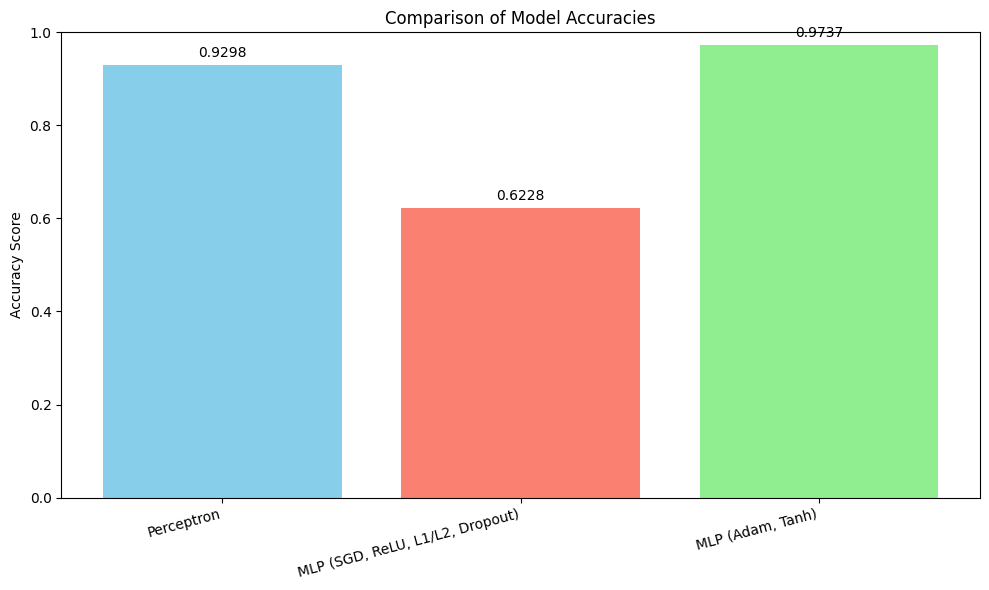

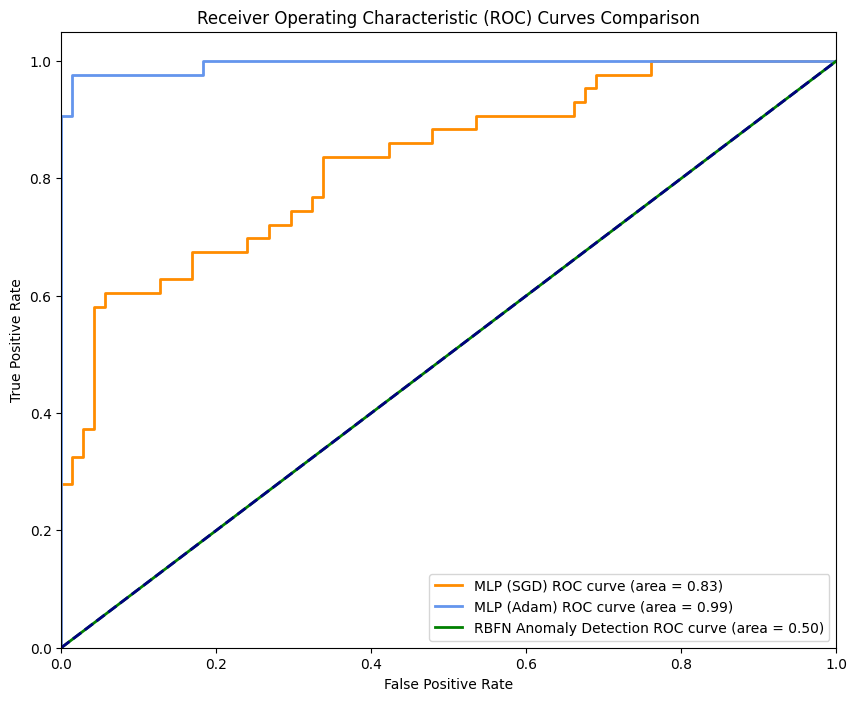

In [10]:
#visualize and compare the results

import matplotlib.pyplot as plt
# Store accuracies in a dictionary for easy plotting
model_accuracies = {
    'Perceptron': accuracy_perceptron,
    'MLP (SGD, ReLU, L1/L2, Dropout)': accuracy_mlp_sgd,
    'MLP (Adam, Tanh)': accuracy_mlp_adam
}

# Create a bar chart to compare model accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=15, ha='right')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Visualize ROC curves for models that provide probability outputs
# Perceptron does not provide probabilities directly, so we exclude it here.
# MLP models with sigmoid output provide probabilities.
# The RBFN anomaly detection also provides an anomaly score which can be used for AUC.

plt.figure(figsize=(10, 8))

# ROC curve for MLP (SGD)
y_prob_mlp_sgd = mlp_sgd.forward(X_test_scaled, training=False).flatten()
fpr_mlp_sgd, tpr_mlp_sgd, _ = roc_curve(y_test, y_prob_mlp_sgd)
roc_auc_mlp_sgd = auc(fpr_mlp_sgd, tpr_mlp_sgd)
plt.plot(fpr_mlp_sgd, tpr_mlp_sgd, color='darkorange', lw=2, label=f'MLP (SGD) ROC curve (area = {roc_auc_mlp_sgd:.2f})')

# ROC curve for MLP (Adam)
y_prob_mlp_adam = mlp_adam.forward(X_test_scaled, training=False).flatten()
fpr_mlp_adam, tpr_mlp_adam, _ = roc_curve(y_test, y_prob_mlp_adam)
roc_auc_mlp_adam = auc(fpr_mlp_adam, tpr_mlp_adam)
plt.plot(fpr_mlp_adam, tpr_mlp_adam, color='cornflowerblue', lw=2, label=f'MLP (Adam) ROC curve (area = {roc_auc_mlp_adam:.2f})')

# ROC curve for RBFN Anomaly Detection (using anomaly scores as 'probabilities')
# Note: The RBFN output is treated as an anomaly score. Higher score = more likely anomaly (Malignant).
# The `roc_curve` function works correctly with anomaly scores and binary labels.
fpr_rbfn, tpr_rbfn, _ = roc_curve(y_test, anomaly_scores)
roc_auc_rbfn = auc(fpr_rbfn, tpr_rbfn)
plt.plot(fpr_rbfn, tpr_rbfn, color='green', lw=2, label=f'RBFN Anomaly Detection ROC curve (area = {roc_auc_rbfn:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves Comparison')
plt.legend(loc="lower right")
plt.show()


In [11]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00


In [12]:
import numpy as np
import gradio as gr

def predict_diagnosis(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst, model_type):

    # Collect input features into a list
    input_features = [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean,
                      radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
                      radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]

    # Convert to a NumPy array and reshape for scaling and prediction
    input_array = np.array(input_features).reshape(1, -1)

    # Scale the input features using the pre-trained scaler
    input_scaled = scaler.transform(input_array)

    if model_type == "Perceptron":
        # Perceptron prediction
        prediction = perceptron.predict(input_scaled[0]) # Perceptron expects a single sample (1D array)
        result = "Malignant" if prediction == 1 else "Benign"
        confidence = "N/A (Perceptron does not output probability)"
    elif model_type == "MLP (SGD)":
        # MLP (SGD) prediction
        probability = mlp_sgd.forward(input_scaled, training=False).flatten()[0]
        prediction = (probability > 0.5).astype(int)
        result = "Malignant" if prediction == 1 else "Benign"
        confidence = f"{probability:.4f}"
    elif model_type == "MLP (Adam)":
        # MLP (Adam) prediction
        probability = mlp_adam.forward(input_scaled, training=False).flatten()[0]
        prediction = (probability > 0.5).astype(int)
        result = "Malignant" if prediction == 1 else "Benign"
        confidence = f"{probability:.4f}"
    elif model_type == "RBFN Anomaly Detection":
         # RBFN Anomaly Detection
         # We train RBFN on Benign data, so a high score indicates it's likely NOT Benign (i.e., potentially Malignant)
         anomaly_score = rbfn.predict(input_scaled).flatten()[0]
         # Let's use the previously determined anomaly_threshold or a default one
         # Note: Tuning this threshold is important for RBFN's anomaly detection performance
         rbfn_anomaly_threshold = 0.5 # Example threshold, can be adjusted
         is_anomaly = anomaly_score > rbfn_anomaly_threshold
         result = "Potentially Malignant (Anomaly Detected)" if is_anomaly else "Likely Benign (Normal Pattern)"
         confidence = f"Anomaly Score: {anomaly_score:.4f}"
    else:
        return "Invalid model type selected.", "N/A"


    return f"Predicted Diagnosis: {result}", f"Confidence/Score: {confidence}"


# Get the list of feature names from the data used for training (excluding 'diagnosis')
feature_names = X.columns.tolist()

# Create Gradio inputs for each feature
input_components = [gr.Number(label=name) for name in feature_names]

# Add a dropdown for model selection
model_dropdown = gr.Dropdown(
    choices=["Perceptron", "MLP (SGD)", "MLP (Adam)", "RBFN Anomaly Detection"],
    label="Select Model"
)

# Combine input components and the model dropdown
all_inputs = input_components + [model_dropdown]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_diagnosis,
    inputs=all_inputs,
    outputs=[gr.Textbox(label="Prediction Result"), gr.Textbox(label="Confidence/Score")],
    title="Breast Cancer Diagnosis Prediction",
    description="Enter the feature values to get a diagnosis prediction using different ANN models.",
    live=False # Set to True to get live updates as you change inputs (can be resource intensive)
)

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://96f990efc763be7ac4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [13]:
print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          